In [1]:
# Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
# Importing libraries for NLP techniques to pre-process data
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Importing packages for building conventional supervised learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier 

In [26]:
# Import methods for building neural networks
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping

# Import 'KerasClassifier' from 'keras' for connecting neural networks with 'sklearn' and 'GridSearchCV'
from keras.wrappers.scikit_learn import KerasClassifier

import os
import warnings
warnings.filterwarnings('ignore')

In [27]:
!ls drive/MyDrive/chirag_data

ls: cannot access 'drive/MyDrive/chirag_data': No such file or directory


In [131]:
#from google.colab import drive
#drive.mount('/content/drive')

# Reading the training data set
movie_reviews = pd.read_csv('drive/MyDrive/Colab Notebooks/train_file_kaggle.csv')
print(movie_reviews.shape)
movie_reviews

(7463, 2)


,Reviews,Sentiments
0,"bittersweet comedy/drama full of life , hand g...",pos
1,you have to pay attention to follow all the st...,pos
2,"overall , interesting as a documentary -- but ...",pos
3,precocious smarter-than-thou wayward teen stru...,pos
4,nicolas philibert observes life inside a one-r...,pos
...,...,...
7458,the concept is a hoot . the trailer is a riot ...,neg
7459,as the movie traces mr . brown's athletic expl...,pos
7460,"may lack the pungent bite of its title , but i...",pos
7461,this romantic thriller is steeped in the atmos...,pos


In [132]:
movie_reviews["Reviews"][1]

"you have to pay attention to follow all the stories , but they're each interesting . the movie is well shot and very tragic , and one to ponder after the credits roll . "

In [133]:
#Tokenize and stopword removal

# Tokenization of text
tokenizer=ToktokTokenizer()

#Setting English stopwords
stopword_list=stopwords.words('english')
stopword_list.extend(['theyre', 'were', 'heis', 'im', 'ias', 'shouldve', 'arent', 'couldnt', 'didnt', 'doesnt'])
print(stopword_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [134]:
# Define function to remove stopwords
def remove_stopwords(text):
    tokens =  tokenizer.tokenize(text)
    #tokens = [token.strip() for token in tokens] 

    # Convert each token in tokens to lowercase and check if it is a stopword. If it is not a stopword, then add it to the filtered_tokens list
    filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)   
    return filtered_text

# Apply function on review column
movie_reviews['Reviews']= movie_reviews['Reviews'].apply(remove_stopwords)

movie_reviews['Reviews'][1]

"pay attention follow stories , ' interesting . movie well shot tragic , one ponder credits roll ."

In [135]:
import re
# Remove punctuation
movie_reviews['Reviews'] = movie_reviews['Reviews'].map(lambda x: re.sub("[,\.!/'?;:]", '', x))

# Convert the titles to lowercase
#movie_reviews['Reviews'] = movie_reviews['Reviews'].str.lower()

# Print out the first rows of papers
movie_reviews['Reviews'][1]

'pay attention follow stories   interesting  movie well shot tragic  one ponder credits roll '

In [121]:
"""# Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
# Apply function on review column
movie_reviews['Reviews']=movie_reviews['Reviews'].apply(simple_stemmer)
movie_reviews.head()"""

"# Stemming the text\ndef simple_stemmer(text):\n    ps=nltk.porter.PorterStemmer()\n    text= ' '.join([ps.stem(word) for word in text.split()])\n    return text\n# Apply function on review column\nmovie_reviews['Reviews']=movie_reviews['Reviews'].apply(simple_stemmer)\nmovie_reviews.head()"

In [137]:
# Performing lemmatization
def simple_lemmatize(text):
    wnl=nltk.WordNetLemmatizer()
    text= ' '.join([wnl.lemmatize(word) for word in text.split()])
    return text
    
# Apply function on review column
movie_reviews['Reviews']=movie_reviews['Reviews'].apply(simple_lemmatize)

movie_reviews['Reviews'][1]

'pay attention follow story interesting movie well shot tragic one ponder credit roll'

In [138]:
#Tf-Idf Data Preparation
from sklearn.model_selection import train_test_split
train, val = train_test_split(movie_reviews, test_size=0.2, random_state=123)
print(train.shape)
print(val.shape)

(5970, 2)
(1493, 2)


In [139]:
#creating list format for Tf-Idf vectorization
train_reviews=list(train['Reviews'])
val_reviews=list(val['Reviews'])

In [166]:
tv = TfidfVectorizer(max_features=800, use_idf=True, ngram_range=(1,2))
tv.fit(train_reviews)

# transformed train reviews
tv_train_reviews = tv.fit_transform(train_reviews)
# transformed val reviews
tv_val_reviews = tv.transform(val_reviews)

print('Tfidf_train:', tv_train_reviews.shape)
print('Tfidf_val:', tv_val_reviews.shape)

Tfidf_train: (5970, 800)
Tfidf_val: (1493, 800)


In [167]:
# Spliting the sentiment data
train_sentiments=train['Sentiments']
val_sentiments=val['Sentiments']

#converting 'pos' to 1 and 'neg' to 0
train_sentiments = train_sentiments.apply(lambda x: np.where(x == 'pos', 1, 0))

val_sentiments = val_sentiments.apply(lambda x: np.where(x == 'pos', 1, 0))

print(train_sentiments)
print(val_sentiments)

3479    0
1012    0
3508    0
3346    1
1591    0
       ..
5218    0
4060    1
1346    1
3454    1
3582    0
Name: Sentiments, Length: 5970, dtype: int64
6007    1
5233    1
2972    1
6915    1
1852    1
       ..
112     1
7118    1
6872    0
2727    1
6592    1
Name: Sentiments, Length: 1493, dtype: int64


Logistic Regression (Lasso Model)

In [177]:
# Log Model hypertuning
from sklearn.linear_model import LogisticRegressionCV

# Log Model
log_clf_best = LogisticRegression(penalty='none', solver='lbfgs', random_state=0, 
                                     max_iter=500).fit(tv_train_reviews, train_sentiments)
log_train_acc = log_clf_best.score(tv_train_reviews, train_sentiments)
log_val_acc = log_clf_best.score(tv_val_reviews, val_sentiments)
print(f' Train accuracy using Log Regression is {log_train_acc}')
print(f' Val accuracy using Log Regression is {log_val_acc}')

#lasso model
C_list = np.arange(0.1,2,0.1)
lasso_reg_cv = LogisticRegressionCV(Cs=C_list, penalty='l1', solver='liblinear', 
                                    random_state=0)
lasso_reg_cv.fit(tv_train_reviews, train_sentiments)
log_cv_train_acc = lasso_reg_cv.score(tv_train_reviews, train_sentiments)
log_cv_val_acc = lasso_reg_cv.score(tv_val_reviews, val_sentiments)
print(f' Train accuracy using Lasso model is {log_cv_train_acc}')
print(f' Val accuracy using Lasso model is {log_cv_val_acc}')

 Train accuracy using Log Regression is 0.7819095477386935
 Val accuracy using Log Regression is 0.7066309444072337
 Train accuracy using Lasso model is 0.7797319932998324
 Val accuracy using Lasso model is 0.7193569993302076


Decision Tree Model

In [178]:
# Tree Model
tree_clf = DecisionTreeClassifier(random_state = 0)

# Define the range of the max_depth parameter
param_grid = {'max_depth': np.arange(120, 150)} # Parameter range

# Perform grid search
grid = GridSearchCV(tree_clf, param_grid, cv = 3, scoring = 'accuracy', return_train_score = False, verbose = 1)
grid_search = grid.fit(tv_train_reviews, train_sentiments)

# Print the optimal value of max_depth
print('The optimal value of max_depth is', grid_search.best_params_['max_depth'])

tree_clf_best = DecisionTreeClassifier(random_state=0, max_depth=134)
tree_clf_best.fit(tv_train_reviews, train_sentiments)

tree_train_acc = tree_clf_best.score(tv_train_reviews, train_sentiments)
tree_val_acc = tree_clf_best.score(tv_val_reviews, val_sentiments)

print(f' Train accuracy using Decision Tree model is {tree_train_acc}')
print(f' Val accuracy using Decision Tree model is {tree_val_acc}')

Fitting 3 folds for each of 30 candidates, totalling 90 fits
The optimal value of max_depth is 139
 Train accuracy using Decision Tree model is 0.8698492462311558
 Val accuracy using Decision Tree model is 0.6001339584728734


KNN Model

In [179]:
# KNN Model
knn_clf = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1,11)} # Parameter range

# defining parameter range2
grid = GridSearchCV(knn_clf, param_grid, cv=3, scoring='accuracy', return_train_score=True, verbose=1)
grid_search = grid.fit(tv_train_reviews, train_sentiments)
print(grid_search.best_params_['n_neighbors'])

# inserting the best parameter and re-fitting a kNN model
knn_clf_best = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])

knn_clf_best.fit(tv_train_reviews, train_sentiments)
knn_train_acc = knn_clf_best.score(tv_train_reviews, train_sentiments)
knn_val_acc = knn_clf_best.score(tv_val_reviews, val_sentiments)

print(f' Train accuracy using KNN model is {knn_train_acc}')
print(f' Val accuracy using KNN model is {knn_val_acc}')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
1
 Train accuracy using KNN model is 0.9852596314907873
 Val accuracy using KNN model is 0.565304755525787


In [180]:
# Tabulating our results for training and validation accuracy
pd.DataFrame([[log_cv_train_acc, log_cv_val_acc], [tree_train_acc, tree_val_acc], 
              [knn_train_acc, knn_val_acc]], columns=['Training Acc', 'Validation Acc'], 
              index = ['Logistic', 'Tree', 'KNN'])

,Training Acc,Validation Acc
Logistic,0.779732,0.719357
Tree,0.869849,0.600134
KNN,0.985260,0.565305


Random Forest Classifier

In [181]:
#Hyperparameter tuning for max_depth and n_estimators

# Create a DecisionTreeClassifier object
tree_clf = RandomForestClassifier(random_state = 0)

# Define the range of the max_depth parameter
param_grid = {'max_depth': np.arange(35, 40, 1), 'n_estimators' : np.arange(380, 500, 20)} # Parameter range

# Perform grid search
grid = GridSearchCV(tree_clf, param_grid, cv = 3, scoring = 'accuracy', return_train_score = False, verbose = 1)
grid_search = grid.fit(tv_train_reviews, train_sentiments)

# Print the optimal value of max_depth
print('The optimal value of max_depth is', grid_search.best_params_['max_depth'])
print('The optimal value of n_estimator is', grid_search.best_params_['n_estimators'])


Fitting 3 folds for each of 30 candidates, totalling 90 fits
The optimal value of max_depth is 39
The optimal value of n_estimator is 400


In [182]:
# Creating the best random forest classifier based on optimal max depth and n_estimators parameters
rf = RandomForestClassifier(n_estimators = grid_search.best_params_['n_estimators'],
                            max_depth = grid_search.best_params_['max_depth'],
                            class_weight = 'balanced',
                            random_state = 123)
rf.fit(tv_train_reviews, train_sentiments)

# Obtaining predictions on the training and validation sets
y_pred_train = rf.predict(tv_train_reviews)
y_pred_val = rf.predict(tv_val_reviews)

rf_train_auc = roc_auc_score(train_sentiments, y_pred_train)
rf_val_auc = roc_auc_score(val_sentiments, y_pred_val)

print('\n ROC-AUC score on the training dataset:', rf_train_auc)
print('\n ROC-AUC score on the val dataset', rf_val_auc)


 ROC-AUC score on the training dataset: 0.8955842648103272

 ROC-AUC score on the val dataset 0.6903418573351279


LightGBM Model

In [183]:
# defining an LGBM
gbm = LGBMClassifier(class_weight = 'balanced',
                     random_state = 123)

# defining parameter range
param_grid = {'n_estimators': np.arange(900,1100,50),
              'learning_rate': np.arange(0.01,0.02, 0.01),
              'max_depth': np.arange(5,15,3)} # Parameter range

# running grid search to find the best combination of hyperparameters
grid = GridSearchCV(gbm, param_grid, cv=3, scoring='accuracy', return_train_score=True, verbose=1)
grid_search = grid.fit(tv_train_reviews, train_sentiments)

grid_search.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


{'learning_rate': 0.01, 'max_depth': 14, 'n_estimators': 1000}

In [188]:
# refitting the model with best grid search parameters
gbm_best = LGBMClassifier(n_estimators=grid_search.best_params_['n_estimators'],
                          learning_rate=grid_search.best_params_['learning_rate'],
                          max_depth= grid_search.best_params_['max_depth'],
                          class_weight = 'balanced',
                          random_state = 123)

gbm_best.fit(tv_train_reviews, train_sentiments)

# finding the accuracies of the updated lgbm model
gbm_train_acc = gbm_best.score(tv_train_reviews, train_sentiments)
gbm_val_acc = gbm_best.score(tv_val_reviews, val_sentiments)

print('Accuracy on the training dataset:\n',gbm_train_acc)
print('\n Accuracy on the validation dataset:\n',gbm_val_acc)

Accuracy on the training dataset:
 0.7728643216080402

 Accuracy on the validation dataset:
 0.6744809109176155


In [185]:
# Obtaining predictions on the training and validation sets
gbm_pred_train = gbm_best.predict(tv_train_reviews)
gbm_pred_val = gbm_best.predict(tv_val_reviews)

gbm_train_auc = roc_auc_score(train_sentiments, gbm_pred_train)
gbm_val_auc = roc_auc_score(val_sentiments, gbm_pred_val)

# Evaluating the gradient boosted model on the training and validation sets using confusion metrics and AUC of ROC
print('ROC-AUC score on the training dataset:',gbm_train_auc)
print('\n ROC AUC on the validation dataset:',gbm_val_auc)

ROC-AUC score on the training dataset: 0.7842713424133073

 ROC AUC on the validation dataset: 0.6731467025572007


In [186]:
import xgboost as xgb

In [187]:
# defining XGBoost
xg = xgb.XGBClassifier(class_weight = 'balanced',
                     random_state = 123)

# defining parameter range
param_grid = {'n_estimators': np.arange(760,800,10),
              'learning_rate': np.arange(0.01,0.03),
              'max_depth': np.arange(13,16)} # Parameter range

# running grid search to find the best combination of hyperparameters
grid = GridSearchCV(xg, param_grid, cv=5, scoring='accuracy', return_train_score=True, verbose=1)
grid_search = grid.fit(tv_train_reviews, train_sentiments)

grid_search.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


{'learning_rate': 0.01, 'max_depth': 13, 'n_estimators': 790}

In [189]:
from xgboost.sklearn import XGBClassifier
# refitting the model with best grid search parameters
xg_best = XGBClassifier(n_estimators=grid_search.best_params_['n_estimators'],
                          learning_rate=grid_search.best_params_['learning_rate'],
                          max_depth= grid_search.best_params_['max_depth'],
                          class_weight = 'balanced',
                          random_state = 123)

xg_best.fit(tv_train_reviews, train_sentiments)

# finding the accuracies of the updated lgbm model
xg_train_acc = xg_best.score(tv_train_reviews, train_sentiments)
xg_val_acc = xg_best.score(tv_val_reviews, val_sentiments)

print('Accuracy on the training dataset:\n',xg_train_acc)
print('\n Accuracy on the validation dataset:\n',xg_val_acc)

Accuracy on the training dataset:
 0.8185929648241206

 Accuracy on the validation dataset:
 0.667113194909578


In [190]:
# Obtaining predictions on the training and validation sets
xg_pred_train = xg_best.predict(tv_train_reviews)
xg_pred_val = xg_best.predict(tv_val_reviews)

xg_train_auc = roc_auc_score(train_sentiments, xg_pred_train)
xg_val_auc = roc_auc_score(val_sentiments, xg_pred_val)

# Evaluating the gradient boosted model on the training and validation sets using confusion metrics and AUC of ROC
print('ROC-AUC score on the training dataset:', xg_train_auc)
print('\n ROC AUC on the validation dataset:',xg_val_auc)

ROC-AUC score on the training dataset: 0.8189129486151528

 ROC AUC on the validation dataset: 0.6672597577388965


In [191]:
# Tabulating our results for training and validation ROC-AUC score
pd.DataFrame([[rf_train_auc, rf_val_auc], [gbm_train_auc, gbm_val_auc], 
              [xg_train_auc, xg_val_auc]], columns=['Training ROC-AUC', 'Validation ROC-AUC'], 
              index = ['Random Forest', 'LightGBM', 'XGBoost'])

,Training ROC-AUC,Validation ROC-AUC
Random Forest,0.895584,0.690342
LightGBM,0.784271,0.673147
XGBoost,0.818913,0.667260


#Deep Learning Models

In [192]:
#Building a deep learning model

# Converting the sparse matrix of a dataset obtained from Tf-Idf vectorization to a sparse tensor 
# This is done as Keras runs on Tensorflow backend and a Keras model accepts a sparse tensor as input, not a sparse matrix

def convert_sparse_matrix_to_sparse_tensor(X):
    coo = X.tocoo()
    indices = np.mat([coo.row, coo.col]).transpose()
    return tf.SparseTensor(indices, coo.data, coo.shape)

In [193]:
# Converting sparse matrix to sparse tensor to submit as input to the Keras model
# Sparse reordering is done because tensorflow accepts input in row-major format

# For the training dataset
tv_train_reviews_nn = tf.sparse.reorder(convert_sparse_matrix_to_sparse_tensor(tv_train_reviews))
train_sentiments_nn = np.asarray(train_sentiments)

# For the validation dataset
tv_val_reviews_nn = tf.sparse.reorder(convert_sparse_matrix_to_sparse_tensor(tv_val_reviews))
val_sentiments_nn = np.asarray(val_sentiments)

In [284]:
# Defining a fully-connected feedforward neural network
def create_nn(activation_function = 'relu',
              hidden1_neurons = 64):
  
    # keras.Input is the input layer of the neural network
    input = keras.Input(shape=(800, ), sparse=True, name="tfidf_maxfeatures")

    # The first hidden layer has 256 nodes and takes the previous layer (input layer) as input as mentioned below
    hidden1 = layers.Dense(hidden1_neurons,
                           activation=activation_function)(input) 
    
    #pooling = layers.MaxPooling2D(pool_size=5, strides=1, padding='valid')

    hidden2 = layers.Dense(32,
                           activation=activation_function)(hidden1)
                      

    # The output layer has 1 node and takes the previous layer (second hidden layer)
    output = layers.Dense(1)(hidden2)

    return keras.Model(input, output)

In [285]:
nn1 = create_nn()

#Since the output layer has only 1 node, we can use "binary_crossentropy"
learning_rate_value = 0.01
nn1.compile(loss = 'binary_crossentropy',
            metrics = ['accuracy'],
            optimizer = RMSprop(learning_rate = learning_rate_value))

nn1.summary()

Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tfidf_maxfeatures (InputLay  [(None, 800)]            0         
 er)                                                             
                                                                 
 dense_84 (Dense)            (None, 64)                51264     
                                                                 
 dense_85 (Dense)            (None, 32)                2080      
                                                                 
 dense_86 (Dense)            (None, 1)                 33        
                                                                 
Total params: 53,377
Trainable params: 53,377
Non-trainable params: 0
_________________________________________________________________


In [286]:
# Training the neural network model on the dataset
nn1_history = nn1.fit(tv_train_reviews_nn, train_sentiments_nn, validation_data=(tv_val_reviews_nn, val_sentiments_nn), epochs = 5)

Epoch 1/5
187/187 [==============================] - 2s 5ms/step - loss: 0.7198 - accuracy: 0.6377 - val_loss: 0.6369 - val_accuracy: 0.7033
Epoch 2/5
187/187 [==============================] - 1s 5ms/step - loss: 0.6688 - accuracy: 0.7213 - val_loss: 0.9940 - val_accuracy: 0.7080
Epoch 3/5
187/187 [==============================] - 1s 5ms/step - loss: 0.6318 - accuracy: 0.7714 - val_loss: 1.2194 - val_accuracy: 0.7106
Epoch 4/5
187/187 [==============================] - 1s 5ms/step - loss: 0.5865 - accuracy: 0.8162 - val_loss: 1.4257 - val_accuracy: 0.7006
Epoch 5/5
187/187 [==============================] - 1s 5ms/step - loss: 0.5401 - accuracy: 0.8702 - val_loss: 1.7233 - val_accuracy: 0.7053


In [287]:
# Convert the neural network history object into a data frame to view its specifics
hist = pd.DataFrame(nn1_history.history)
hist['epoch'] = nn1_history.epoch
hist['epoch'] = hist['epoch'].apply(lambda x: x + 1)
hist.set_index('epoch')

,loss,accuracy,val_loss,val_accuracy
epoch,,,,
1,0.719819,0.637688,0.636911,0.703282
2,0.668845,0.721273,0.994031,0.707970
3,0.631826,0.771357,1.219440,0.710650
4,0.586531,0.816248,1.425652,0.700603
5,0.540062,0.870184,1.723300,0.705291


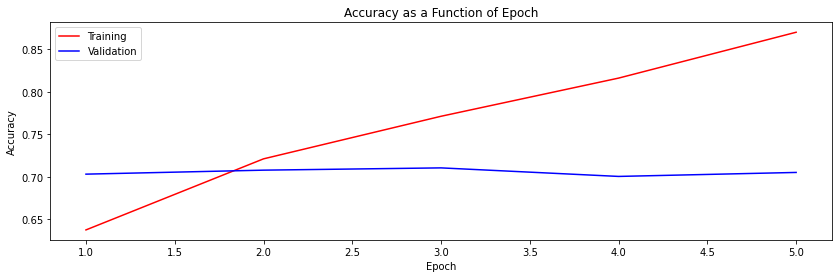

In [288]:
# View the training and validation accuracies as functions of epoch
plt.figure(figsize = (14, 4))

sns.lineplot(data = hist, x = 'epoch', y = 'accuracy', color = 'red', label = 'Training')
sns.lineplot(data = hist, x = 'epoch', y = 'val_accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Epoch');

In [289]:
# Compute the final accuracy of the model on the validation data set using the 'evaluate()' method
performance_test = nn1.evaluate(tv_val_reviews_nn, val_sentiments_nn)

print('The loss value of the model on the validation data is {}'.format(performance_test[0]))
print('The accuracy of the model on the validation data is {}'.format(performance_test[1]))

47/47 [==============================] - 0s 3ms/step - loss: 1.7233 - accuracy: 0.7053
The loss value of the model on the validation data is 1.7233003377914429
The accuracy of the model on the validation data is 0.7052913308143616


In [291]:
# Declare a range of activation functions and number of neurons in the first hidden layer to tune for
activation_function_list = ['sigmoid', 'relu']
hidden1_neurons_list = [128, 256]

# Create and train a neural network model for each value of learning rate
performance_df = pd.DataFrame(data = None)
hist = [None] * 4
indexcount = -1

for current_activation_function in activation_function_list:
    for current_hidden1_neurons in hidden1_neurons_list:
        indexcount = indexcount + 1
        
        # Create a neural network model using the 'create_nn' function
        nn = create_nn(activation_function = current_activation_function,
                      hidden1_neurons = current_hidden1_neurons)
        
        nn.compile(loss = 'binary_crossentropy',
                    metrics = ['accuracy'],
                    optimizer = RMSprop(learning_rate = 0.01))

        # Capture the training history of the model using the 'fit()' method

        print('\n activation_function = {},'.format(current_activation_function) + ' hidden1_neurons = {} - START \n'.format(current_hidden1_neurons))
        nn.summary()
        print('\n')
        nn_history = nn.fit(tv_train_reviews_nn, train_sentiments_nn, validation_data=(tv_val_reviews_nn, val_sentiments_nn), epochs = 5)
        print('\n activation_function = {},'.format(current_activation_function) + ' hidden1_neurons = {} - END \n'.format(current_hidden1_neurons))
        
        hist[indexcount] = pd.DataFrame(nn_history.history)
        hist[indexcount]['epoch'] = nn_history.epoch
        
        tempdf = pd.DataFrame(index = [indexcount],
                              data = {'Activation Function': current_activation_function,
                                      'First hidden layer neurons': current_hidden1_neurons,
                                      'Train Accuracy': hist[indexcount]['accuracy'][4],
                                      'Validation Accuracy': hist[indexcount]['val_accuracy'][4]})
        
        performance_df = pd.concat([performance_df, tempdf])


 activation_function = sigmoid, hidden1_neurons = 128 - START 

Model: "model_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tfidf_maxfeatures (InputLay  [(None, 800)]            0         
 er)                                                             
                                                                 
 dense_99 (Dense)            (None, 128)               102528    
                                                                 
 dense_100 (Dense)           (None, 32)                4128      
                                                                 
 dense_101 (Dense)           (None, 1)                 33        
                                                                 
Total params: 106,689
Trainable params: 106,689
Non-trainable params: 0
_________________________________________________________________


Epoch 1/5
187/187 [==============================] 

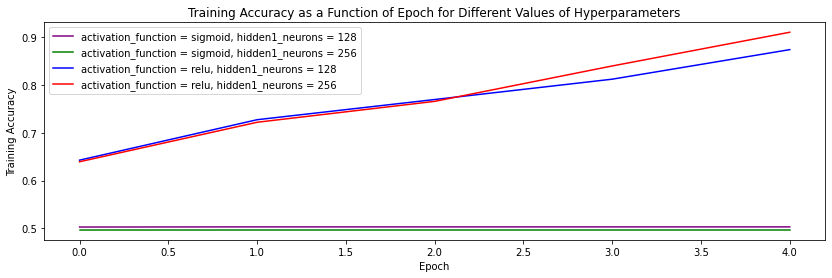

In [292]:
# View the training accuracies as functions of epochs for different values of learning rate
plt.figure(figsize = (14, 4))
colorlist = ['purple', 'green', 'blue', 'red']

indexcount = -1
for current_activation_function in activation_function_list:
    for current_hidden1_neurons in hidden1_neurons_list:
        indexcount = indexcount + 1
        sns.lineplot(data = hist[indexcount],
                    x = 'epoch',
                    y = 'accuracy',
                    color = colorlist[indexcount],
                    label = 'activation_function = ' + str(current_activation_function) + ', hidden1_neurons = ' + str(current_hidden1_neurons))

plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy as a Function of Epoch for Different Values of Hyperparameters');

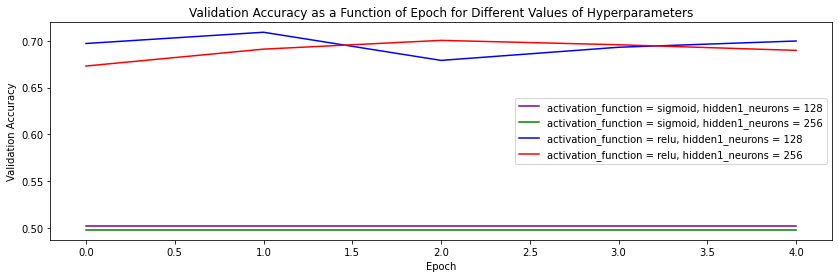

In [293]:
# View the training accuracies as functions of epochs for different values of learning rate
plt.figure(figsize = (14, 4))
colorlist = ['purple', 'green', 'blue', 'red']

indexcount = -1
for current_activation_function in activation_function_list:
    for current_hidden1_neurons in hidden1_neurons_list:
        indexcount = indexcount + 1
        sns.lineplot(data = hist[indexcount],
                    x = 'epoch',
                    y = 'val_accuracy',
                    color = colorlist[indexcount],
                    label = 'activation_function = ' + str(current_activation_function) + ', hidden1_neurons = ' + str(current_hidden1_neurons))

plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy as a Function of Epoch for Different Values of Hyperparameters');

In [294]:
# Use the 'create_nn' function to create a neural network with the optimal values of 'activation_function' and 'hidden1_neurons'

nn2 = create_nn(activation_function = 'relu', hidden1_neurons = 128)

nn2.compile(loss = 'binary_crossentropy',
            metrics = ['accuracy'],
            optimizer = RMSprop(learning_rate = 0.01))

# Capture the training history of the model using the 'fit()' method
nn2.summary()
print('\n')
nn2_history = nn2.fit(tv_train_reviews_nn, train_sentiments_nn, validation_data=(tv_val_reviews_nn, val_sentiments_nn), epochs = 5)
hist = pd.DataFrame(nn2_history.history)
hist['epoch'] = nn2_history.epoch

Model: "model_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tfidf_maxfeatures (InputLay  [(None, 800)]            0         
 er)                                                             
                                                                 
 dense_111 (Dense)           (None, 128)               102528    
                                                                 
 dense_112 (Dense)           (None, 32)                4128      
                                                                 
 dense_113 (Dense)           (None, 1)                 33        
                                                                 
Total params: 106,689
Trainable params: 106,689
Non-trainable params: 0
_________________________________________________________________


Epoch 1/5
187/187 [==============================] - 2s 6ms/step - loss: 0.7535 - accuracy: 0.6325 - val_loss: 0.728

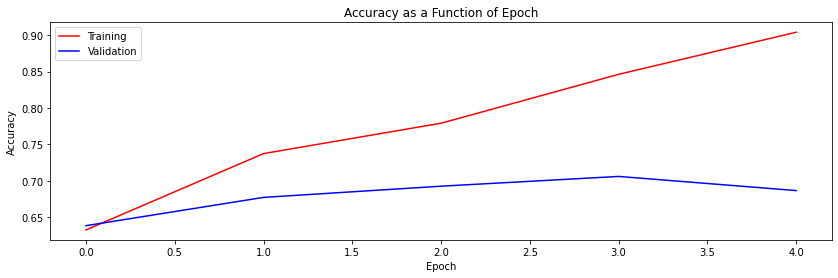

In [295]:
# View the training and validation accuracies as functions of epoch
plt.figure(figsize = (14, 4))

sns.lineplot(data = hist, x = 'epoch', y = 'accuracy', color = 'red', label = 'Training')
sns.lineplot(data = hist, x = 'epoch', y = 'val_accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Epoch');

In [296]:
# Compute the final accuracy of the model on the validation data set using the 'evaluate()' method
performance_test = nn2.evaluate(tv_val_reviews_nn, val_sentiments_nn)

print('The loss value of the model on the validation data is {}'.format(performance_test[0]))
print('The accuracy of the model on the validation data is {}'.format(performance_test[1]))

47/47 [==============================] - 0s 3ms/step - loss: 2.6374 - accuracy: 0.6865
The loss value of the model on the validation data is 2.6374378204345703
The accuracy of the model on the validation data is 0.6865371465682983


In [297]:
#Kaggle Submission
# Reading the test data set
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_file_kaggle.csv')
print(test.shape)
test.head()

(3199, 1)


,Reviews
0,the inhospitability of the land emphasizes the...
1,"see it now , before the inevitable hollywood r..."
2,"the weight of the piece , the unerring profess..."
3,the large-frame imax camera lends itself beaut...
4,"what makes how i killed my father compelling ,..."


In [264]:
# Apply NLP techniques to pre-process the data set

test['Reviews'] = test['Reviews'].map(lambda x: re.sub('[,\.!?;:]/', '', x))
test['Reviews'] = test['Reviews'].map(lambda x: x.lower())
# Removing stopwords and tokenization
test['Reviews'] = test['Reviews'].apply(remove_stopwords)
# Stemming
#test['Reviews'] = test['Reviews'].apply(simple_stemmer)
# Lemmatization
test['Reviews'] = test['Reviews'].apply(simple_lemmatize)

In [265]:
# Tfidf vectorizer
test_reviews=list(test['Reviews'])

# transformed test reviews from the TfIdf vectorizer used on the training data set in task 1
tv_test_reviews = tv.transform(test_reviews)

print('Tfidf_val:', tv_test_reviews.shape)

Tfidf_val: (3199, 800)


In [ ]:
# NOTE: Use this cell to convert your testing dataset tf idf vectorization into appripriate format
# if you are using your neural network as your final model.
# If you are using a machine learning model, you don't need to use this cell.

# For the testing dataset
#tv_test_reviews_nn = tf.sparse.reorder(convert_sparse_matrix_to_sparse_tensor(tv_test_reviews))

In [267]:
# Use your trained optimized machine learning model to make predictions on the prepared test data set
y_pred_test = lasso_reg_cv.predict(tv_test_reviews)
print("prediction shape:", y_pred_test.shape)
y_pred_test

prediction shape: (3199,)


array([1, 1, 0, ..., 0, 1, 1])

In [268]:
y_pred_test = lasso_reg_cv.predict(tv_test_reviews)
y_classes = (y_pred_test > 0.5).astype(int)
y_classes

array([1, 1, 0, ..., 0, 1, 1])

In [269]:
submit = pd.DataFrame(y_classes, columns=['Category'])
submit.index.name = 'Id'

In [270]:
submit.to_csv("test_file_kaggle_log_submission.csv", header=True, index=True)